In [ ]:
'''
8 9 8 1 2 6 9    8 9 8 1 2 6 9
4 9 4 0 6 1 7    1 9 4 0 6 1 7
6 9 5 4 4 8 4    6 9 5 4 4 8 4
0 5 6 4 7 9 3    0 5 6 8 7 9 3
2 6 0 8 3 9 6    2 5 0 8 3 9 6
1 6 2 0 5 4 4    1 1 2 0 5 4 4
9 6 2 6 1 0 0    9 6 2 6 1 0 0
'''

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import Isomap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys()) 

#print(digits.DESCR)

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


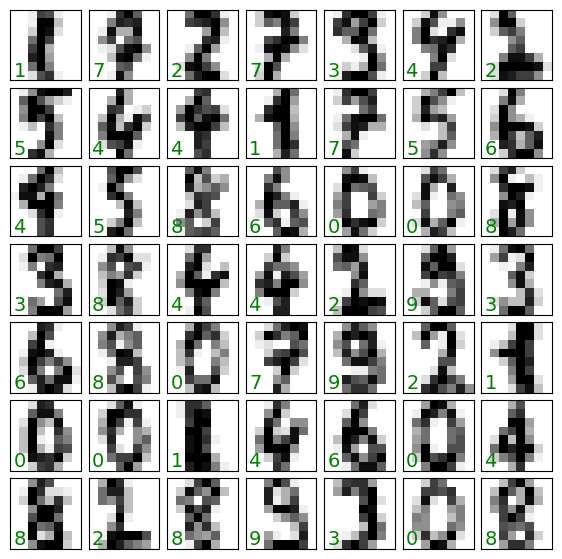

In [2]:
fig, axes = plt.subplots(7,7, figsize=(7, 7))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

In [3]:
print(digits.data.shape)

# The images themselves
print(digits.images.shape)

# The data for use in our algorithms
#print(digits.data[0])

# The labels
print(digits.target)
#print(digits.target[0])

(1797, 64)
(1797, 8, 8)
[0 1 2 ... 8 9 8]


In [4]:
#riduco le dimensioni
embedding = Isomap(n_components=2)   
embedding.fit(digits.data)

C:\Users\leoni\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\leoni\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [5]:
reduced=embedding.transform(digits.data)
print(reduced.shape)

(1797, 2)


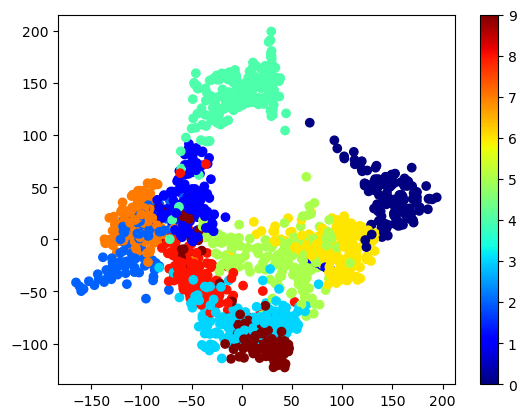

In [6]:
formatter = plt.FuncFormatter(lambda i, *args: digits.target[int(i)])

plt.scatter(reduced[:, 0], reduced[:, 1], 
            c=digits.target, cmap=plt.colormaps['jet'])
plt.colorbar(ticks=range(10), format=formatter)

#i valori sugli assi non hanno più senso perchè sono una combinazione delle 64 dimensioni

In [7]:
X=digits.data
y=digits.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

Xtrain_red, Xtest_red, ytrain_red, ytest_red = train_test_split(reduced, y, test_size=0.2)

print(Xtrain.shape)
print(Xtest.shape)
print(len(ytrain))
print(len(ytest))

(1437, 64)
(360, 64)
1437
360


In [15]:
from sklearn.linear_model import LogisticRegression

#per fare classification
obj=LogisticRegression(penalty='l2', max_iter=2000,solver='sag')
obj.fit(Xtrain, ytrain)
ypred_test=obj.predict(Xtest)
ypred_train=obj.predict(Xtrain)

In [12]:
obj=LogisticRegression(penalty='l2', max_iter=3000,solver='sag')
obj.fit(Xtrain_red, ytrain_red)
ypred_red_test=obj.predict(Xtest_red)
ypred_red_train=obj.predict(Xtrain_red)

In [16]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(ytest, ypred_test)   
print("accuracy test set:", accuracy)

accuracy=accuracy_score(ytrain, ypred_train)   
print("accuracy train set:", accuracy)

accuracy_red=accuracy_score(ytest_red, ypred_red_test)   
print("accuracy test set ridotto", accuracy_red)    

accuracy_red=accuracy_score(ytrain_red, ypred_red_train) 
print("accuracy train set ridotto", accuracy_red)    

accuracy test set: 0.9555555555555556
accuracy train set: 1.0
accuracy test set ridotto 0.6472222222222223
accuracy train set ridotto 0.6833681280445373


In [17]:
conf_matrix=confusion_matrix(ytest, ypred_test)
print("confusion matrix:") 
print(conf_matrix)

conf_matrix_red=confusion_matrix(ytest_red, ypred_red_test)
print("confusion matrix per dati ridotti:") 
print(conf_matrix_red)

confusion matrix:
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  1  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  1 33  0  0  0  3]
 [ 0  0  0  0  0  1 36  0  0  0]
 [ 0  0  0  0  1  0  0 34  1  0]
 [ 0  2  0  0  1  0  0  1 35  0]
 [ 0  0  0  0  0  1  0  0  1 37]]
confusion matrix per dati ridotti:
[[25  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  1  0  3  0  1  0]
 [ 0  1 16  0  0  0  0 17  3  0]
 [ 0  0  0 22  0  0  0  0  6 13]
 [ 0  1  0  0 40  0  0  0  0  0]
 [ 0  1  0  0  0 21  8  0  1  0]
 [ 0  1  0  0  0  6 26  0  0  0]
 [ 0  0 15  0  0  0  0 21  0  0]
 [ 0  1  1  0  0  0  0  0 25  2]
 [ 0  1  2 37  0  0  0  3  2  1]]
